**UCS2604 Principles of Machine Learning**

**ASSIGNMENT 5**

Apurva Narayan

3122 21 5001 011


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/ML/online_shoppers_intention.csv'

# Read the CSV file
data = pd.read_csv(file_path)

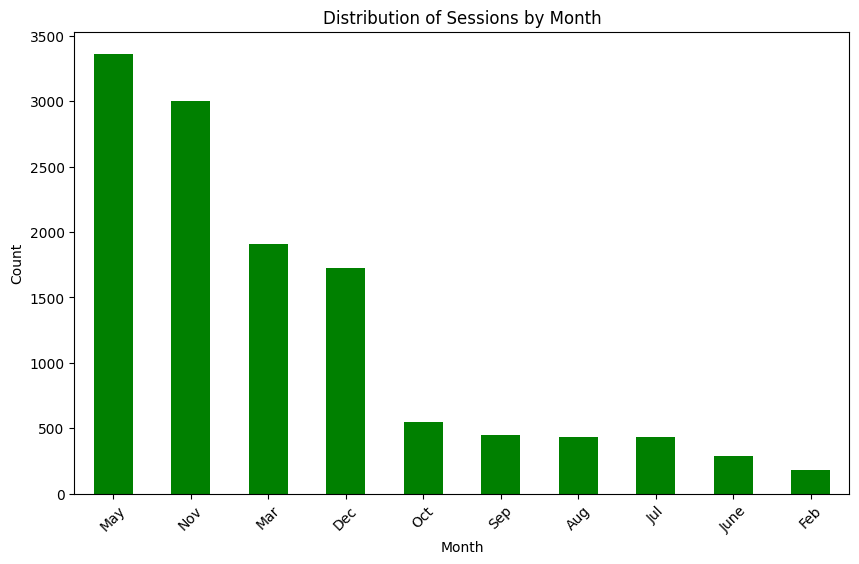

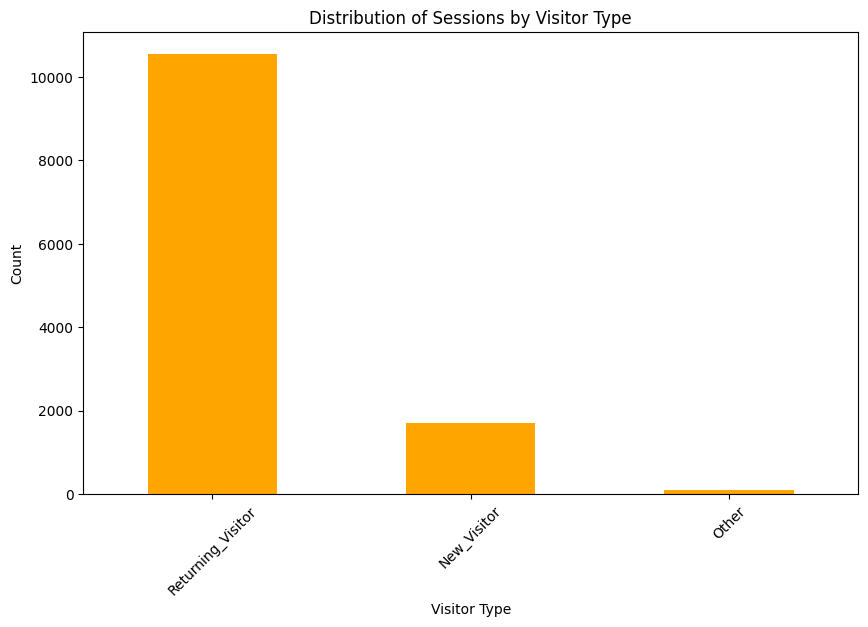

In [ ]:
plt.figure(figsize=(10, 6))
data['Month'].value_counts().plot(kind='bar', color='green')
plt.title('Distribution of Sessions by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
data['VisitorType'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Sessions by Visitor Type')
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# One-hot encode the 'Month' column
data = pd.get_dummies(data, columns=['Month'])


In [ ]:
print(data.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Aug  Month_Dec  \
0         0.20       0.20         0.0         0.0  ...          0          0   
1         0.00       0.10         0.0         0.0  .

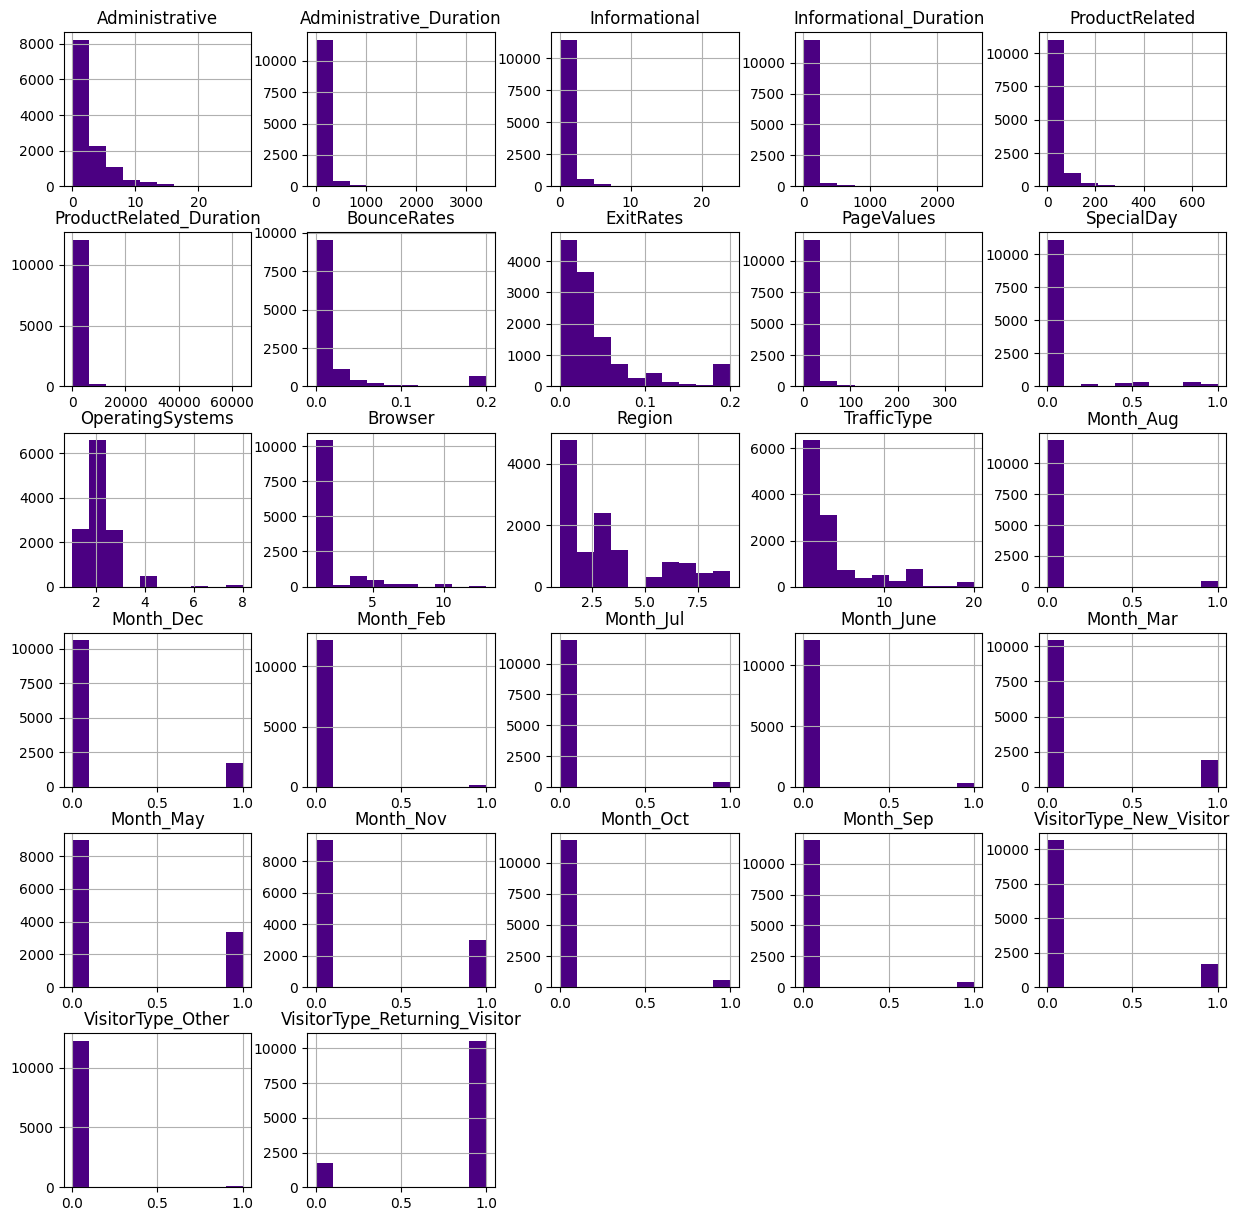

In [ ]:
# Step 3: Exploratory Data Analysis
# Visualize features from the dataset
# Example:
data.hist(figsize=(15, 15),color='indigo')
plt.show()


In [ ]:
# Step 5: Split the data into training, testing, and validation sets
X = data.drop(columns=['Revenue'])
y = data['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.97      0.92      2055
        True       0.71      0.33      0.45       411

    accuracy                           0.87      2466
   macro avg       0.79      0.65      0.69      2466
weighted avg       0.85      0.87      0.84      2466



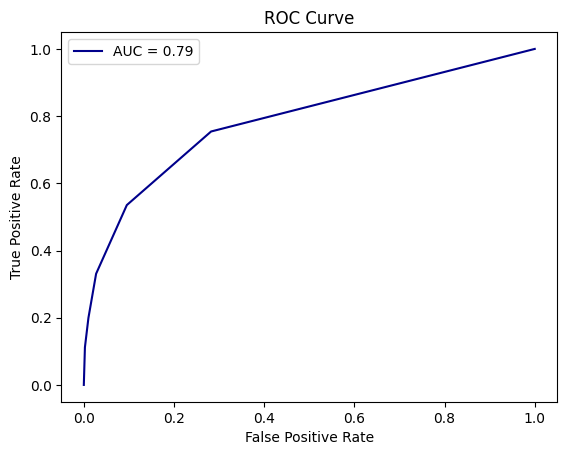

Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.98      0.92      2055
        True       0.71      0.30      0.42       411

    accuracy                           0.86      2466
   macro avg       0.79      0.64      0.67      2466
weighted avg       0.85      0.86      0.84      2466



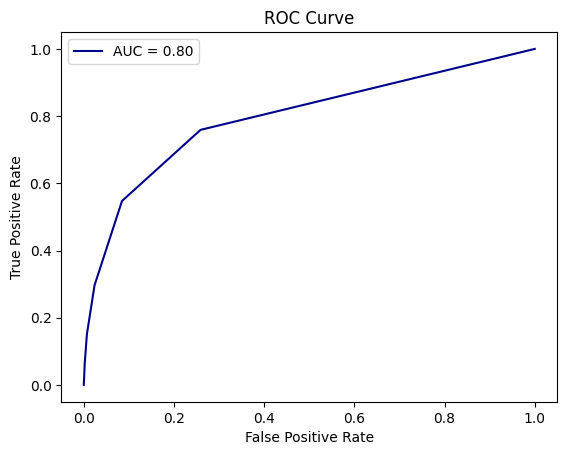

Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.97      0.92      2055
        True       0.71      0.33      0.45       411

    accuracy                           0.87      2466
   macro avg       0.79      0.65      0.69      2466
weighted avg       0.85      0.87      0.84      2466



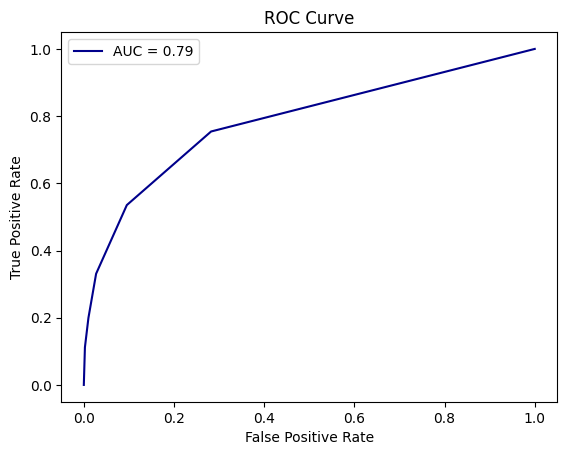

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from google.colab import drive

# Mount Google Drive
#drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/ML/online_shoppers_intention.csv'
data = pd.read_csv(file_path)

# Preprocessing
# Perform one-hot encoding on categorical variables
data = pd.get_dummies(data)

# Separate features (X) and target variable (y)
X = data.drop(columns=['Revenue'])
y = data['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the KNN classifier
def knn_classifier(X_train, y_train, X_test, y_test, metric='euclidean'):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train KNN model
    model = KNeighborsClassifier(metric=metric)
    model.fit(X_train_scaled, y_train)

    # Evaluate model
    y_pred = model.predict(X_test_scaled)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot ROC curve
    y_probs = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}',color='darkblue')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Using Euclidean distance metric
knn_classifier(X_train, y_train, X_test, y_test, metric='euclidean')

# Using Manhattan distance metric
knn_classifier(X_train, y_train, X_test, y_test, metric='manhattan')

# Using Minkowski distance metric (p=3)
knn_classifier(X_train, y_train, X_test, y_test, metric='minkowski')
